#Código criado para detectar o momento onde classes de um determinado conjunto de dados surgem.

Todos os dasets são de origem do repositório: [CIG-UFSCar](https://github.com/CIG-UFSCar/DS_Datasets/tree/master)

##Parte principal

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def dataset_analysis(url_csv: str, column_class: str = 'class', columns_xy: tuple = ('X1', 'X2')):
  try:
    df = pd.read_csv(url_csv)
    print("Arquivo salvo com sucesso")
    print(df.head())
  except Exception as e:
    print(f"Erro ao salvar o arquivo: {e}")
    print("\n--- Tentando ler o arquivo usando separador alternativo")
    try:
      df = pd.read_csv(url_csv, sep = ',')
      print("Arquivo carregado com sucesso usando ',' como separador")
      print(df.head())
    except Exception as e2:
      print(f"A tentativa com ',' também falhou: {e2}")
      assert False, "Falha ao carregador o dataset"

  print("\n")

  #Visualização 1: Histograma
  sns.histplot(df[column_class], kde = True)
  plt.title(f"Distribuição da coluna '{column_class}'")
  plt.xlabel("Valores")
  plt.ylabel("Frequência")
  plt.show()

  print("\n")

  #Visualização 2: Dispersão
  if columns_xy[0] in df.columns and columns_xy[1] in df.columns:
    sns.scatterplot(data = df, x = columns_xy[0], y = columns_xy[1], hue = column_class, palette = 'Set2')
    plt.title(f"Distribuição dos dados por classe")
    plt.xlabel(columns_xy[0])
    plt.ylabel(columns_xy[1])
    plt.legend(title = 'Classe')
    plt.grid(True)
    plt.show()
  else:
    print(f"Colunas {columns_xy} não encontradas no dataset para o gráfico de dispersão")

  print("\n")

  #Descoberta das primeiras ocorrências
  df['instance'] = df.index
  unique_classes = sorted(df[column_class].unique())
  first_occurrences = {}

  for c in unique_classes:
    indices = df[df[column_class] == c].index
    if len(indices) > 0:
      idx = indices[0]
      first_occurrences[c] = idx
      print(f"Classe {c} aparece pela primeira vez na instância: {idx}")
    else:
      print(f"Classe {c} não teve instância detectada")

  print("\n")

  #Gráfico de linha + marcação de primeira ocorrências
  plt.figure(figsize = (14, 6))
  sns.lineplot(data = df, x = 'instance', y = column_class, hue = column_class, palette = 'Set2', linewidth=2.5)

  for c, idx, in first_occurrences.items():
    plt.axvline(x = idx, linestyle = '--', color = 'black')

  for c, idx in first_occurrences.items():
    y_value = df.loc[idx, column_class]
    plt.scatter(idx, y_value, color = 'black', s = 80, zorder = 5)

  plt.title("Ocorrência das classes ao longo das instâncias")
  plt.xlabel("Instância")
  plt.ylabel("Classe")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

##Testes com datasets (*Non-Stationary*)



###Dataset: `RBF1_40000.csv`



Arquivo salvo com sucesso
         X1        X2  class
0  0.375202  0.191557    2.0
1  0.352832  0.152618    2.0
2  0.073426  0.418165    3.0
3  0.362786  0.133626    2.0
4  0.388315  0.139123    2.0




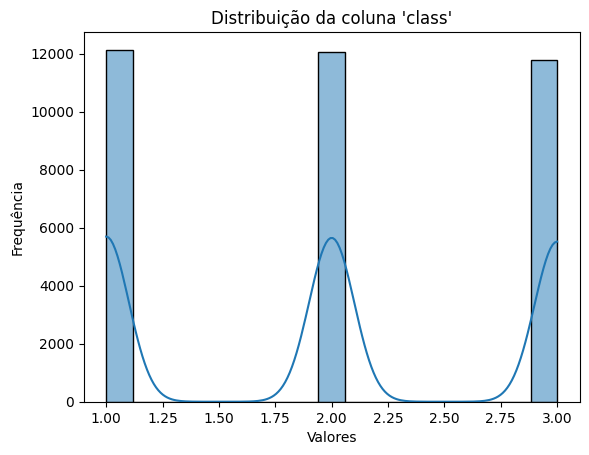

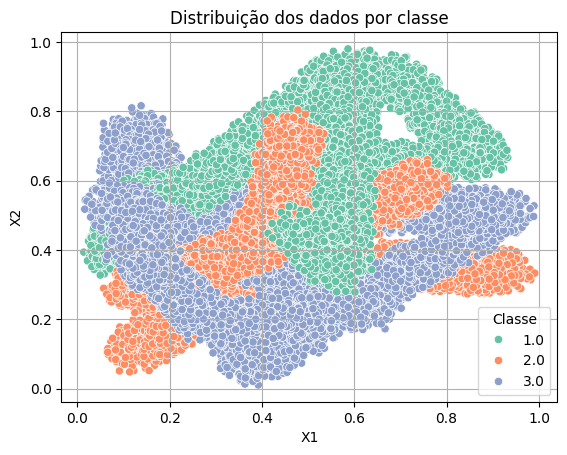



Classe 1.0 aparece pela primeira vez na instância: 6
Classe 2.0 aparece pela primeira vez na instância: 0
Classe 3.0 aparece pela primeira vez na instância: 2
Classe nan não teve instância detectada




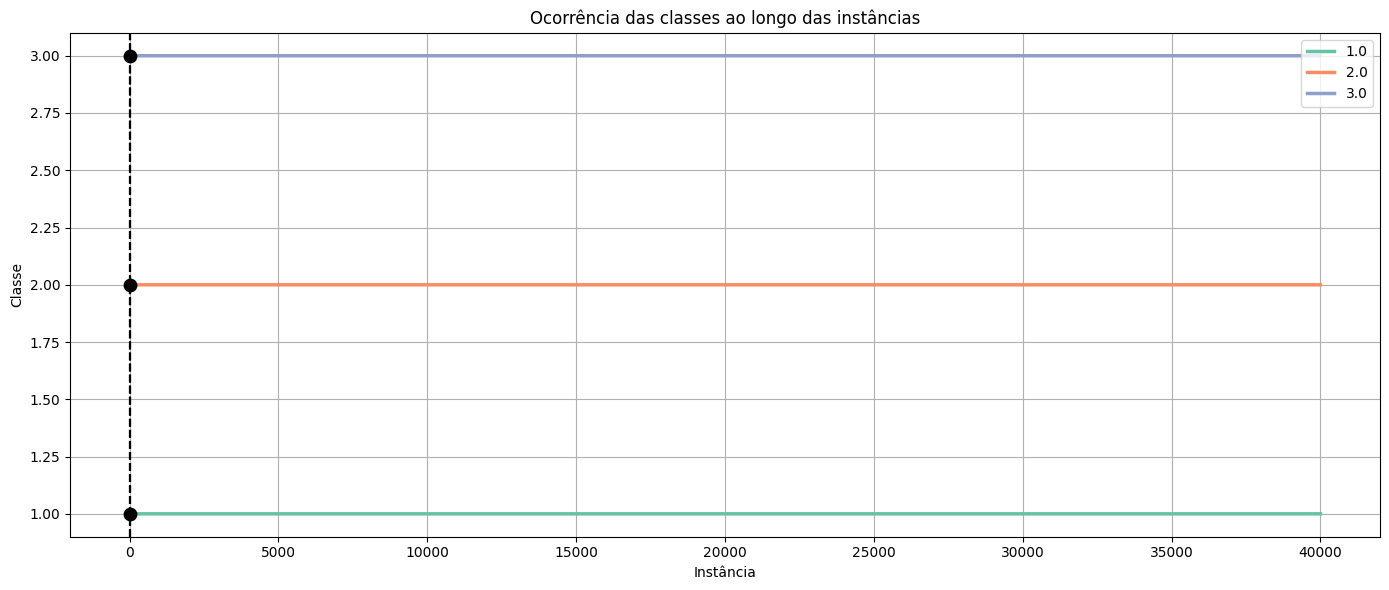

In [ ]:
dataset_analysis(
    url_csv = 'https://raw.githubusercontent.com/CIG-UFSCar/DS_Datasets/master/Synthetic/Non-Stationary/RBF1_40k/RBF1_40000.csv',
    column_class = 'class',
    columns_xy = ('X1', 'X2')
)

####Obs.:

*   Número de instâncias: **<font color = 'orange'>40.000</font>**;
*   Atributos: **<font color = 'orange'>3</font>**
    *  Tipos de atributos:
        *  X1: **<font color = 'orange'>numérico</font>**;
        *  X2: **<font color = 'orange'>numérico</font>**
        *  class: **<font color = 'orange'>categórico</font>**.
    * Valores faltantes? - **<font color = 'green'>Não</font>**.
    * Ruídos? - **<font color = 'red'>Sim</font>**.
    * Descrição: Instâncias divididas em 3 **<font color = 'orange'>classes</font>**, representadas por gausianas, que se movem em 2 dimensões no espaço, com sobreposições em alguns pontos.

###Dataset: `RBF2_40000.csv`


Arquivo salvo com sucesso
         X1        X2  class
0  0.684838  0.248513    1.0
1  0.300377  0.764781    3.0
2  0.615773  0.614227    2.0
3  0.706174  0.320230    1.0
4  0.266227  0.697070    3.0




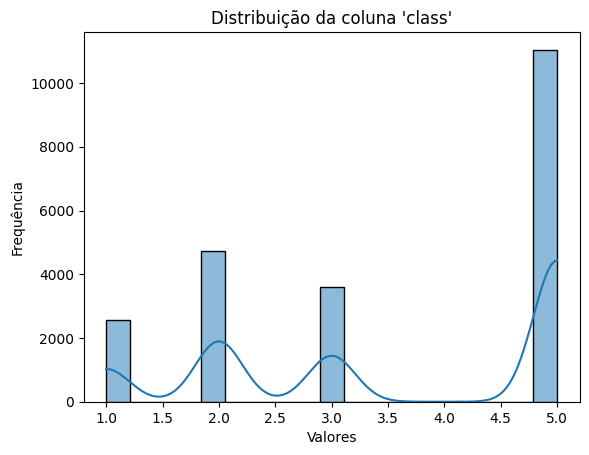

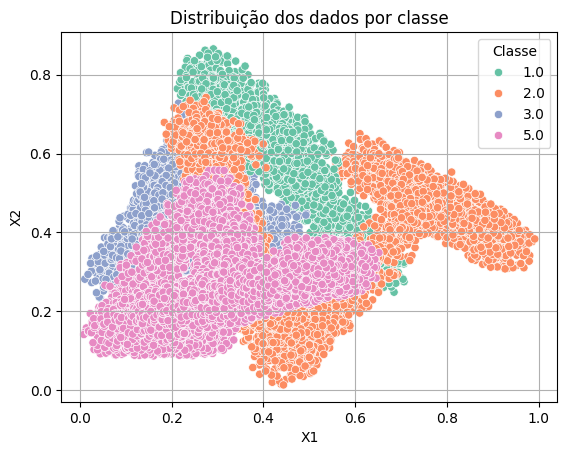



Classe 1.0 aparece pela primeira vez na instância: 0
Classe 2.0 aparece pela primeira vez na instância: 2
Classe 3.0 aparece pela primeira vez na instância: 1
Classe nan não teve instância detectada
Classe 5.0 aparece pela primeira vez na instância: 24194




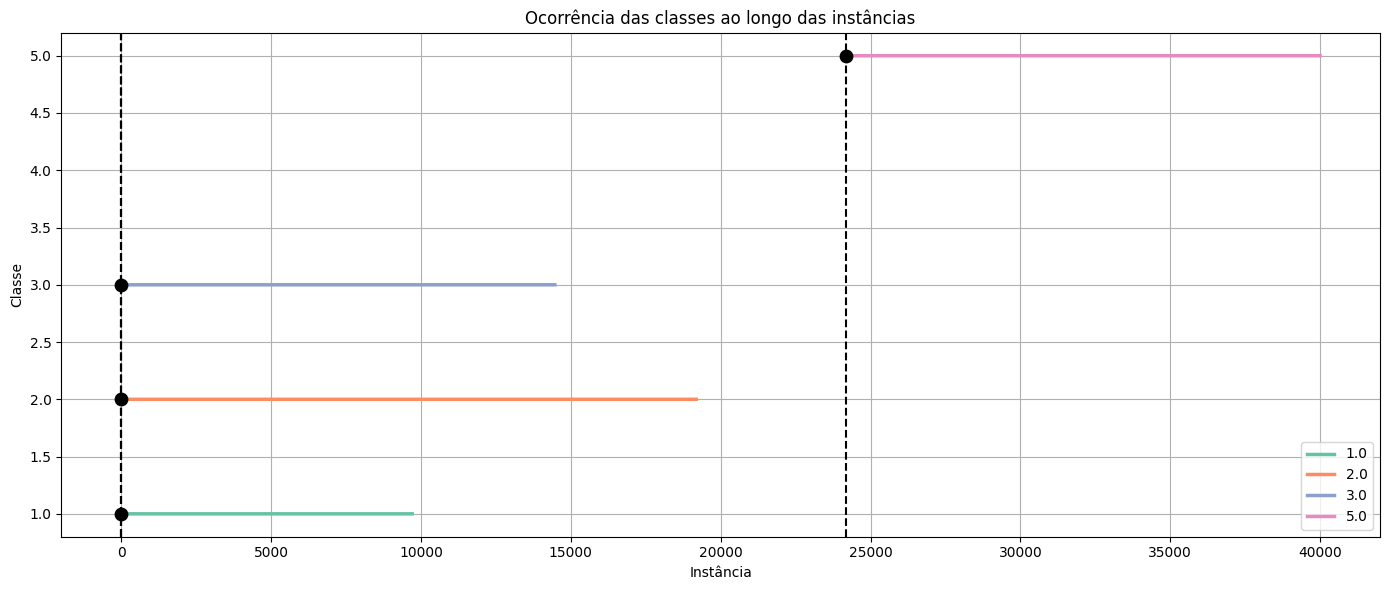

In [ ]:
dataset_analysis(
    url_csv = 'https://raw.githubusercontent.com/CIG-UFSCar/DS_Datasets/master/Synthetic/Non-Stationary/RBF2_40k/RBF2_40000.csv',
    column_class = 'class',
    columns_xy = ('X1', 'X2')
)

####Obs.:

*   Número de instâncias: **<font color = 'orange'>40.000</font>**;
*   Atributos: **<font color = 'orange'>3</font>**
    *  Tipos de atributos:
        *  X1: **<font color = 'orange'>numérico</font>**;
        *  X2: **<font color = 'orange'>numérico</font>**
        *  class: **<font color = 'orange'>categórico</font>**.
    * Valores faltantes? - **<font color = 'green'>Não</font>**.
    * Ruídos? - **<font color = 'red'>Sim</font>**.
    * Descrição: Instâncias divididas em **<font color = 'orange'>classes</font>**, representadas por gausianas, que se movem em 2 dimensões no espaço, com sobreposições em alguns pontos.
    * Comportamento: Inicia com 3 classes em movimento, uma porção de dados ruidosos é gerado a partir de um evento de divisão (clustering). Os ruidos se juntam com as três classes (transformando os dados em ruidos). O aglomerado denso sofre clustering, gerando uma quarta classe que acaba por se fundir com o aglomerado ruidoso.

###Dataset: `RBF3_40000.csv`



Arquivo salvo com sucesso
         X1        X2  class
0  0.684838  0.248513    1.0
1  0.300377  0.764781    3.0
2  0.615773  0.614227    2.0
3  0.706174  0.320230    1.0
4  0.266227  0.697070    3.0




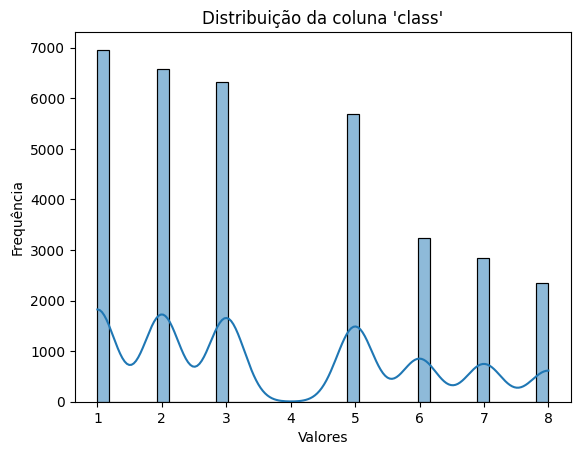

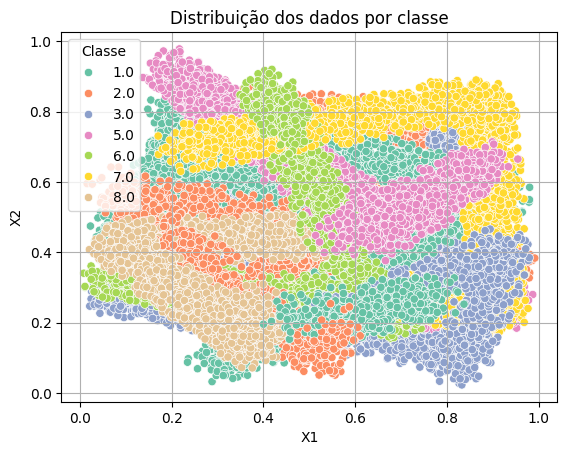



Classe 1.0 aparece pela primeira vez na instância: 0
Classe 2.0 aparece pela primeira vez na instância: 2
Classe 3.0 aparece pela primeira vez na instância: 1
Classe nan não teve instância detectada
Classe 5.0 aparece pela primeira vez na instância: 10001
Classe 6.0 aparece pela primeira vez na instância: 20002
Classe 7.0 aparece pela primeira vez na instância: 24999
Classe 8.0 aparece pela primeira vez na instância: 30000




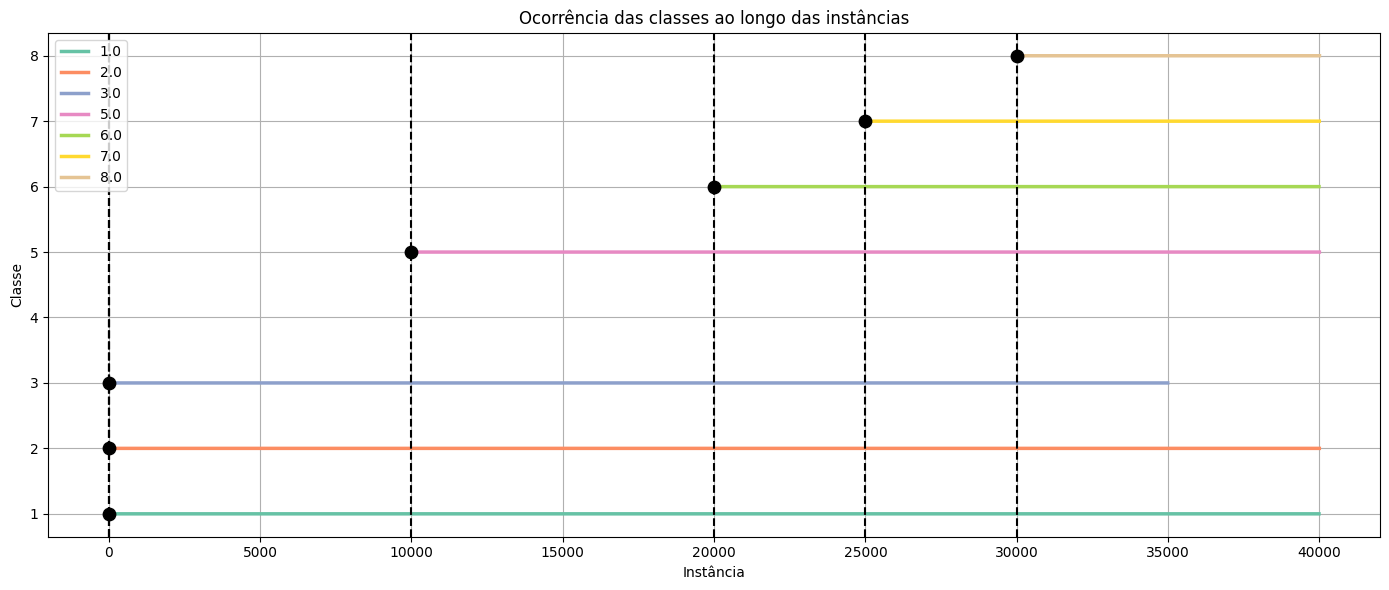

In [ ]:
dataset_analysis(
    url_csv = 'https://raw.githubusercontent.com/CIG-UFSCar/DS_Datasets/master/Synthetic/Non-Stationary/RBF3_40k/RBF3_40000.csv',
    column_class = 'class',
    columns_xy = ('X1', 'X2')
)

####Obs.:

*   Número de instâncias: **<font color = 'orange'>40.000</font>**;
*   Atributos: **<font color = 'orange'>3</font>**
    *  Tipos de atributos:
        *  X1: **<font color = 'orange'>numérico</font>**;
        *  X2: **<font color = 'orange'>numérico</font>**
        *  class: **<font color = 'orange'>categórico</font>**.
    * Valores faltantes? - **<font color = 'green'>Não</font>**.
    * Ruídos? - **<font color = 'red'>Sim</font>**.
    * Descrição: Instâncias divididas em **<font color = 'orange'>classes</font>**, representadas por gausianas, que se movem em 2 dimensões no espaço, com sobreposições em alguns pontos.
    * Comportamento: Inicia com 3 classes em movimento. Um conjunto do dados é criado (ruidos), mais tarde é criada também uma quarta classe. Depois, o conjunto de dados ruidosos é elimnado. Uma quinta classe logo em seguida surge, seguindo da sexta, sétima (intervalo máximo). Por fim, uma das classes iniciais é elimnada.

###Dataset: `RBF4_40000.csv`

Arquivo salvo com sucesso
         X1        X2  class
0  0.250649  0.364990    5.0
1  0.458461  0.597411    1.0
2  0.287195  0.376433    5.0
3  0.502666  0.036960    NaN
4  0.290002  0.070341    NaN




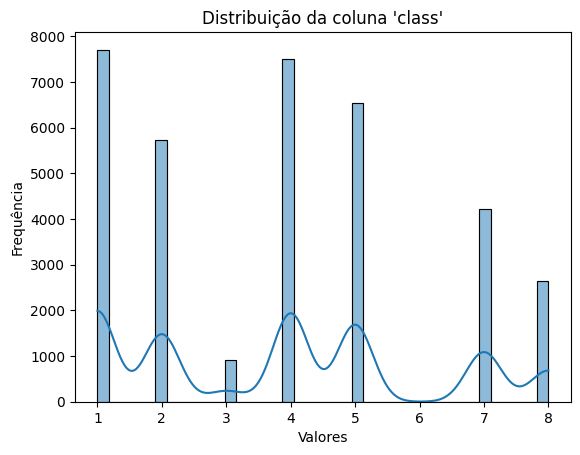

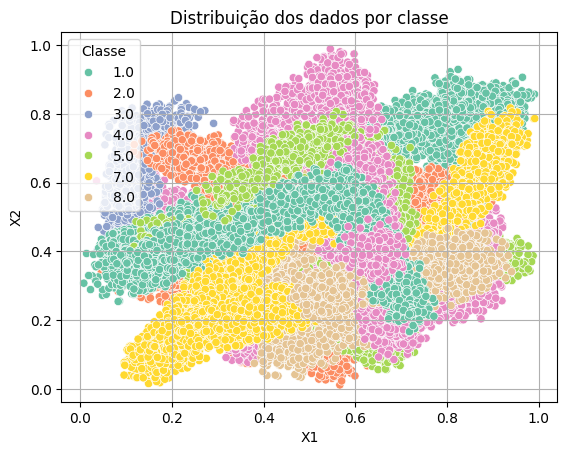



Classe 1.0 aparece pela primeira vez na instância: 1
Classe 2.0 aparece pela primeira vez na instância: 14
Classe 3.0 aparece pela primeira vez na instância: 8
Classe 4.0 aparece pela primeira vez na instância: 6
Classe 5.0 aparece pela primeira vez na instância: 0
Classe nan não teve instância detectada
Classe 7.0 aparece pela primeira vez na instância: 20008
Classe 8.0 aparece pela primeira vez na instância: 24999




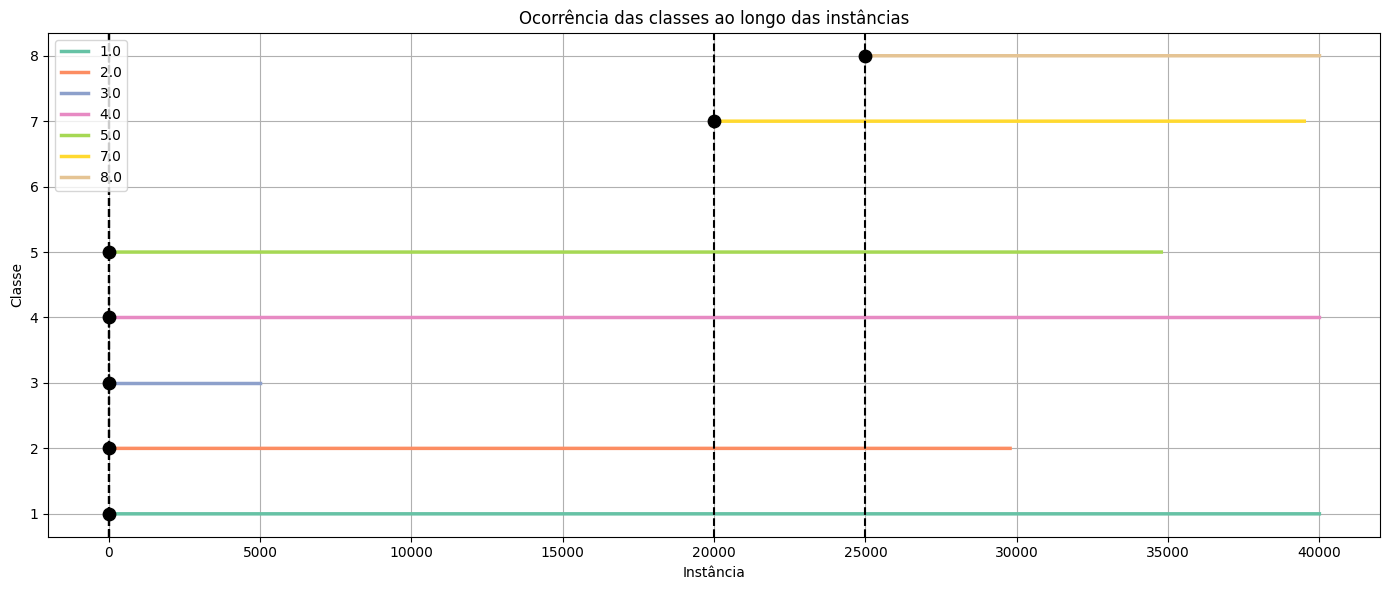

In [ ]:
dataset_analysis(
    url_csv = 'https://raw.githubusercontent.com/CIG-UFSCar/DS_Datasets/master/Synthetic/Non-Stationary/RBF4_40k/RBF4_40000.csv',
    column_class = 'class',
    columns_xy = ('X1', 'X2')
)

####Obs.:

*   Número de instâncias: **<font color = 'orange'>40.000</font>**;
*   Atributos: **<font color = 'orange'>3</font>**
    *  Tipos de atributos:
        *  X1: **<font color = 'orange'>numérico</font>**;
        *  X2: **<font color = 'orange'>numérico</font>**
        *  class: **<font color = 'orange'>categórico</font>**.
    * Valores faltantes? - **<font color = 'green'>Não</font>**.
    * Ruídos? - **<font color = 'red'>Sim</font>**.
    * Descrição: Instâncias divididas em **<font color = 'orange'>classes</font>**, representadas por gausianas, que se movem em 2 dimensões no espaço, com sobreposições em alguns pontos.
    * Comportamento: Inicia com 5 classes em movimento. Em seguida, uma classe é elimnada. Depois os dados ruidosos é separado de uma das classes, e logo depois já é deletado. Uma sexta classe surge. A sétima classe é separada de uma das outras classes, já a sexta classe é fundida com uma das classes originais, uma das classes originais é elimnada e a sexta classe é eliminada.